In [265]:
import pandas as pd
import numpy as np
import plotly.express as px
import os
import matplotlib.pyplot as plt
from scipy.stats import skew

src = 'CCRSDataFinal/'

In [217]:
# What is the total number of I-502 panels and Medical panels by lab over time?

#############################################

# This is a high memory method, loading all of the csvs into memory (24gb)
# However, this makes a dictionary of dataframes which would be useful for more complex tasks. 

##############################################

#df_dict = {}
#
## get a list of all files in the directory
#file_list = os.listdir(src)
#
## get a list of prefixes
#prefix_list = list(set([file.split('_')[0] for file in file_list if '_' in file and file.endswith('.csv')]))
#
## make a dictionary of dataframes
#for prefix in prefix_list:
#    prefix_files = [file for file in file_list if file.startswith(prefix) and file.endswith('.csv')]
#    df_list = [pd.read_csv(os.path.join(src,file)) for file in prefix_files]
#    df_dict[prefix] = pd.concat(df_list, keys=[file.replace('.csv', '') for file in prefix_files], ignore_index=False)
#
#for prefix, df in df_dict.items():
#    df.to_parquet(f'{prefix}.parquet', engine='pyarrow', index=False)

df_dict = {}

# get a list of all files in the directory
file_list = os.listdir(src)

# get a list of prefixes
# prefix_list = list(set([file.split('_')[0] for file in file_list if '_' in file and file.endswith('.csv')]))
prefix_list = ['LabResult']


# make a dictionary of dataframes
for prefix in prefix_list:
    prefix_files = [file for file in file_list if file.startswith(prefix) and file.endswith('.csv')]
    df_list = [pd.read_csv(os.path.join(src, file)) for file in prefix_files]
    df_concat_LabResult = pd.concat(df_list, keys=[(prefix, file) for file in prefix_files], ignore_index=False)
    # df_concat_LabResult.to_csv(f'{prefix}.gz', index=True, compression='gzip')

# my kernel keeps crashing while doing this so I am going to just skip this stuff for now and work with one df at a time and figure some stuff out.

/tmp/ipykernel_19042/1184577775.py:40: DtypeWarning:

Columns (7,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipykernel_19042/1184577775.py:40: DtypeWarning:

Columns (7,12,13) have mixed types. Specify dtype option on import or set low_memory=False.



## How much testing is going on?
since THC is required for everything, looking at the number of THC tests is a good approximation of the number of lots.
when using a relational db, this could be refined.

/tmp/ipykernel_19042/751391053.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_19042/751391053.py:5: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



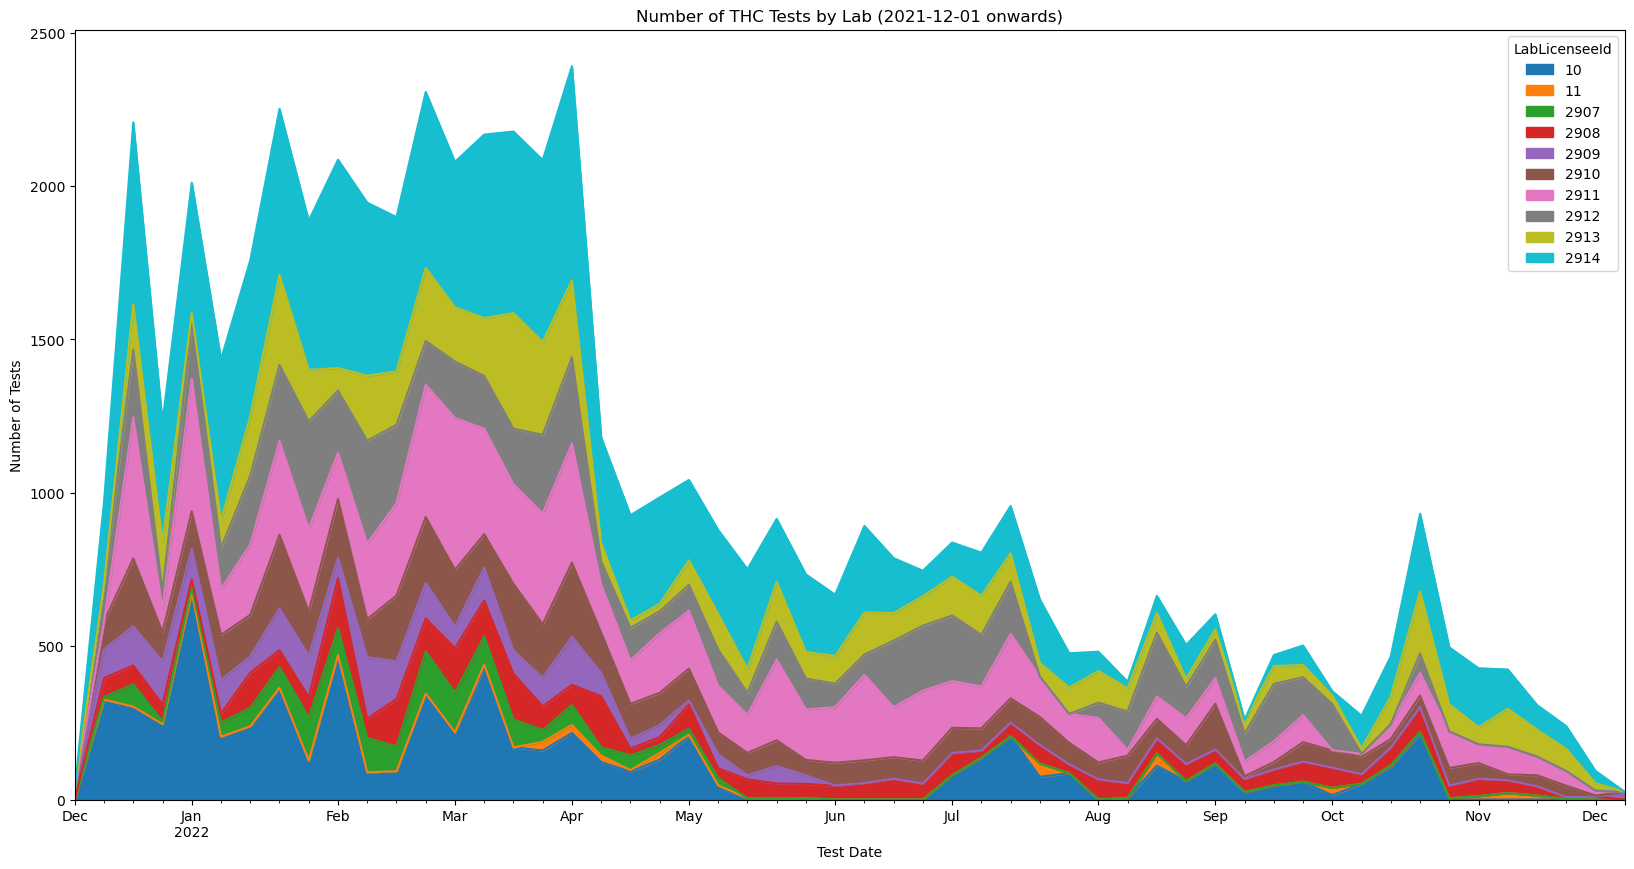

In [218]:
df = df_concat_LabResult
df = df[df['TestName'].str.contains("Total THC")]
df['TestDate'] = pd.to_datetime(df['TestDate'])
df = df.set_index('TestDate')
df = df.loc['2021-12-01':]
df = df[df['TestName'] != 'Potency - Total THC ()']

grouped = df.groupby(['LabLicenseeId', 'TestDate']).count()
grouped = grouped.unstack(level=0)
grouped = grouped.resample('W').sum()
grouped = grouped['TestName']
grouped.plot(kind='area', stacked=True, figsize=(20, 10))
plt.xlabel('Test Date')
plt.ylabel('Number of Tests')
plt.title('Number of THC Tests by Lab (2021-12-01 onwards)')
plt.show()

In [219]:
df

LabResultId  LabLicenseeId  LicenseeId LabTestStatus  InventoryId  \
TestDate                                                                        
2021-12-08            3             10        1395      Required            8   
2021-12-08           12             10        1395      Required            9   
2021-12-08           18             10        1395      Required            6   
2021-12-08           26             10        1395      Required            4   
2021-12-08           27             10        1395      Required            5   
...                 ...            ...         ...           ...          ...   
2022-11-04      1531598           2914         766          Pass     14919269   
2022-11-04      1531604           2914         766          Pass     14919284   
2022-11-04      1531610           2914         766          Pass     14919265   
2022-11-04      1531616           2914        1167          Pass     14919480   
2022-11-04      1531622           2914        1167          Pass     14919484   

                           TestName TestValue  \
TestDate                                        
2021-12-08  Potency - Total THC (%)      0.27   
2021-12-08  Potency - Total THC (%)      0.29   
2021-12-08  Potency - Total THC (%)      0.14   
2021-12-08  Potency - Total THC (%)      0.28   
2021-12-08  Potency - Total THC (%)      0.27   
...                             ...       ...   
2022-11-04  Potency - Total THC (%)      36.0   
2022-11-04  Potency - Total THC (%)      41.0   
2022-11-04  Potency - Total THC (%)      37.0   
2022-11-04  Potency - Total THC (%)      45.0   
2022-11-04  Potency - Total THC (%)      52.0   

                              ExternalIdentifier  IsDeleted        CreatedBy  \
TestDate                                                                       
2021-12-08  12a2f27f-daf6-4e43-bd8d-ef03a927769a      False      Bobby Hines   
2021-12-08  3acfb61e-1b39-4d8d-ac7a-48a62021963f      False      Bobby Hines   
2021-12-08  637e73d0-1155-4811-88b5-afe153677271      False      Bobby Hines   
2021-12-08  818a008d-7b14-48ce-b286-15f984fab26a      False      Bobby Hines   
2021-12-08  8775fb54-0dce-427f-b1a7-71dca17754cc      False      Bobby Hines   
...                                          ...        ...              ...   
2022-11-04                   CLR.107702.649872.0      False  Beatriz Ramirez   
2022-11-04                   CLR.107703.649873.0      False  Beatriz Ramirez   
2022-11-04                   CLR.107704.649874.0      False  Beatriz Ramirez   
2022-11-04                   CLR.107767.650271.0      False  Beatriz Ramirez   
2022-11-04                   CLR.107768.650273.0      False  Beatriz Ramirez   

                    CreatedDate UpdatedBy UpdatedDate  
TestDate                                               
2021-12-08  2021-12-08 00:00:00       NaN         NaN  
2021-12-08  2021-12-08 00:00:00       NaN         NaN  
2021-12-08  2021-12-08 00:00:00       NaN         NaN  
2021-12-08  2021-12-08 00:00:00       NaN         NaN  
2021-12-08  2021-12-08 00:00:00       NaN         NaN  
...                         ...       ...         ...  
2022-11-04  2022-11-03 00:00:00       NaN         NaN  
2022-11-04  2022-11-03 00:00:00       NaN         NaN  
2022-11-04  2022-11-03 00:00:00       NaN         NaN  
2022-11-04  2022-11-04 00:00:00       NaN         NaN  
2022-11-04  2022-11-04 00:00:00       NaN         NaN  

[55067 rows x 13 columns]

In [220]:
grouped = df.groupby(['TestName']).resample('W').size()
trend = grouped.unstack(level=0)
trend = trend.reset_index()
trend

TestName   TestDate  Potency - Total THC (%)  Potency - Total THC (mg/g)  \
0        2021-12-05                     32.0                         NaN   
1        2021-12-12                    951.0                         NaN   
2        2021-12-19                   2030.0                        60.0   
3        2021-12-26                   1070.0                        46.0   
4        2022-01-02                   1943.0                        41.0   
5        2022-01-09                   1343.0                        58.0   
6        2022-01-16                   1611.0                       111.0   
7        2022-01-23                   2058.0                       158.0   
8        2022-01-30                   1730.0                       114.0   
9        2022-02-06                   1983.0                        62.0   
10       2022-02-13                   1779.0                       128.0   
11       2022-02-20                   1724.0                       117.0   
12       2022-02-27                   2110.0                       145.0   
13       2022-03-06                   1917.0                       108.0   
14       2022-03-13                   2008.0                       118.0   
15       2022-03-20                   1914.0                       218.0   
16       2022-03-27                   1888.0                       165.0   
17       2022-04-03                   2196.0                       152.0   
18       2022-04-10                   1093.0                        39.0   
19       2022-04-17                    844.0                        34.0   
20       2022-04-24                    905.0                        32.0   
21       2022-05-01                    938.0                        50.0   
22       2022-05-08                    764.0                        68.0   
23       2022-05-15                    646.0                        47.0   
24       2022-05-22                    786.0                        67.0   
25       2022-05-29                    644.0                        44.0   
26       2022-06-05                    550.0                        55.0   
27       2022-06-12                    761.0                        72.0   
28       2022-06-19                    653.0                        45.0   
29       2022-06-26                    608.0                        48.0   
30       2022-07-03                    692.0                        64.0   
31       2022-07-10                    673.0                        73.0   
32       2022-07-17                    821.0                        47.0   
33       2022-07-24                    613.0                        24.0   
34       2022-07-31                    398.0                        42.0   
35       2022-08-07                    396.0                        50.0   
36       2022-08-14                    280.0                        40.0   
37       2022-08-21                    582.0                        26.0   
38       2022-08-28                    441.0                        13.0   
39       2022-09-04                    518.0                        17.0   
40       2022-09-11                    217.0                        21.0   
41       2022-09-18                    370.0                        29.0   
42       2022-09-25                    423.0                        20.0   
43       2022-10-02                    277.0                        14.0   
44       2022-10-09                    239.0                        16.0   
45       2022-10-16                    405.0                        52.0   
46       2022-10-23                    781.0                       111.0   
47       2022-10-30                    410.0                        51.0   
48       2022-11-06                    373.0                        38.0   
49       2022-11-13                    338.0                        72.0   
50       2022-11-20                    254.0                        45.0   
51       2022-11-27                    203.0    

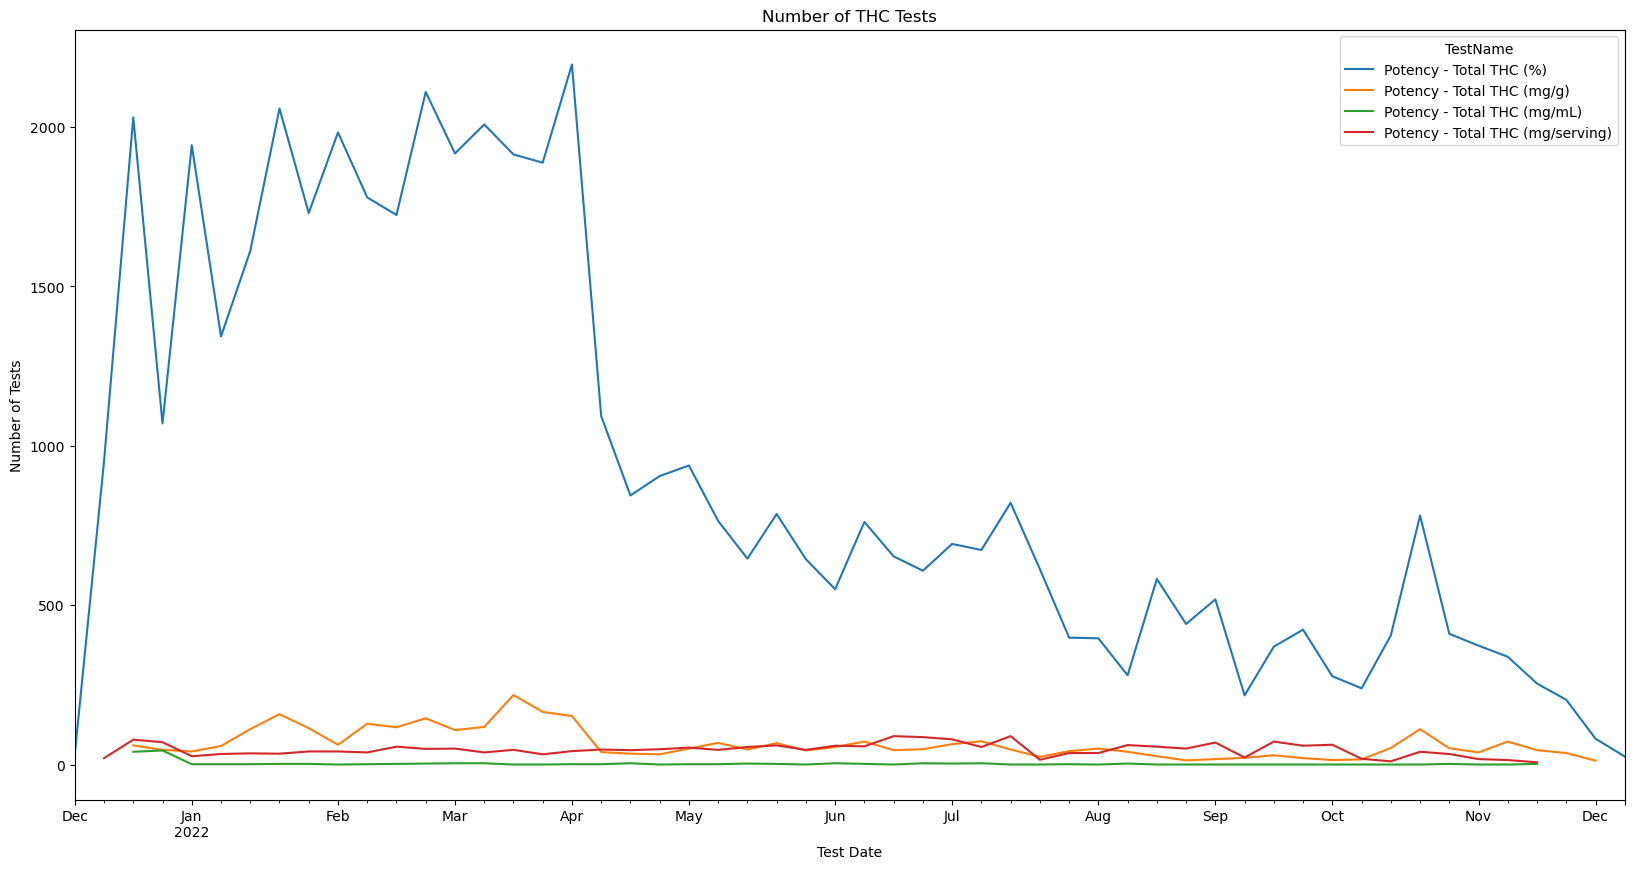

In [221]:
trend.plot(x='TestDate', kind='line', figsize=(20, 10))
plt.xlabel('Test Date')
plt.ylabel('Number of Tests')
plt.title('Number of THC Tests')
plt.show()

## failure rates by lab
Are the labs with high failure rates being punished? what can I figure out about the labs that failed after the change in testing?

In [222]:
df = df_concat_LabResult
df.value_counts('LabTestStatus')

LabTestStatus
Pass           1512358
Required        110241
NotRequired       7771
Fail              1255
dtype: int64

## what are the test groups?
because there are many tests within one battery, these aren't unique test orders for individual products. Removing the double counting can be done later with a relational database, but for now creation of test category columns will help analysis.

In [223]:
df = df_concat_LabResult
df['TestName'] = df['TestName'].str.replace("Moistures", "Moisture")
prefix_list_lab_tests = list(set([labTest.split(' - ')[0] for labTest in df['TestName'] if ' - ' in labTest]))
prefix_list_lab_tests

['Residual Solvent',
 'Mycotoxin',
 'Microbiological',
 'Moisture Analysis',
 'Heavy Metal',
 'Potency',
 'Foreign Matter',
 'Pesticide']

In [224]:
# create a dictionary to store the counts
counts = {prefix: 0 for prefix in prefix_list_lab_tests}

# loop through the prefix_list_lab_tests and count the occurrences
for prefix in prefix_list_lab_tests:
    counts[prefix] = sum(df['TestName'].str.startswith(prefix))
counts

{'Residual Solvent': 144752,
 'Mycotoxin': 88177,
 'Microbiological': 109198,
 'Moisture Analysis': 57620,
 'Heavy Metal': 472,
 'Potency': 334936,
 'Foreign Matter': 77289,
 'Pesticide': 779267}

## what is the distribution of moisture analysis results?
are the results still funny with an unnatural distribution?

In [225]:
# renaming mislabels, and splitting between aw and % tests

df_moisture = df[df['TestName'].str.startswith('Moisture')]
# relable some things here

df_moisture.loc[df_moisture['TestName'].str.contains("Moisture & Water Activity-Moisture\(%\)"), 'TestName'] = "Moisture Analysis - Moisture Content (%)"
df_moisture.loc[df_moisture['TestName'].str.contains("Moisture & Water Activity-Water Activity (aw)(%)"), 'TestName'] = "Moisture Analysis - Water Activity (aw)"
df_moisture.loc[df_moisture['TestName'].str.contains("Aw"), 'TestName'] = "Moisture Analysis - Water Activity (aw)"
df_moisture['TestName'] = np.where(df_moisture['TestName'] == "Moisture Content", "Moisture Analysis - Moisture Content (%)", df_moisture['TestName'])

df_moisture.value_counts('LabTestStatus')

/tmp/ipykernel_19042/26489117.py:7: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.

/tmp/ipykernel_19042/26489117.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



LabTestStatus
Pass           53563
Required        3938
NotRequired       89
Fail              35
dtype: int64

there are bad values in the moisture data, where people submitted 'Required' and 'NotRequired' in the 'LabTestStatus' column, this means that the lab results were not compliant with a specification and they should have been rejected by the CCRS before accepting, as they are the incorrect types.

What about inside of the value list itself?

In [226]:
df_moisture_aw = df_moisture[df_moisture['TestName'] == 'Moisture Analysis - Water Activity (aw)']


In [227]:
df_moisture_percent = df_moisture[df_moisture['TestName'] == 'Moisture Analysis - Moisture Content (%)']
df_moisture_percent['TestValue'] = df_moisture_percent['TestValue'].astype(str)
df_moisture_percent['TestValue'] = pd.to_numeric(df_moisture_percent['TestValue'], errors='coerce')

bad_values_percent_moisture = df_moisture_percent.loc[df_moisture_percent['TestValue'].isna()]
bad_values_percent_moisture['LabLicenseeId'] = bad_values_percent_moisture['LabLicenseeId'].astype(str)


/tmp/ipykernel_19042/4073965752.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_19042/4073965752.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_19042/4073965752.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



these two labs are not submitting type compliant data. What might their reason be? What is going on with the at large NotREquired and REquired datasets? is it that whoever the integrator was had a bad setting initially?

In [228]:
df_moisture_percent.value_counts('LabTestStatus')

LabTestStatus
Pass           21763
Required        1966
NotRequired       45
Fail              13
dtype: int64

In [229]:
df_moisture_percent_required = df_moisture_percent.loc[df_moisture_percent['LabTestStatus'].isin(['Required', 'NotRequired'])]


df_moisture_percent_required.value_counts('LabLicenseeId')

LabLicenseeId
2909    1967
2913      44
dtype: int64

In the moisture % results, labs 2909, 2913, and 2912 all contributed to the bad data.

In [247]:
df_moisture_aw['TestValue'] = df_moisture_aw['TestValue'].astype(str)
df_moisture_aw['TestValue'] = pd.to_numeric(df_moisture_aw['TestValue'], errors='coerce')

bad_values_aw_moisture = df_moisture_aw.loc[df_moisture_aw['TestValue'].isna()]
bad_values_aw_moisture['LabLicenseeId'] = bad_values_aw_moisture['LabLicenseeId'].astype(str)
bad_values_aw_moisture.value_counts('LabLicenseeId')

/tmp/ipykernel_19042/3913263945.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_19042/3913263945.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Series([], dtype: int64)

In [248]:
df_moisture_aw.value_counts('LabTestStatus')

LabTestStatus
Pass    33668
Fail       20
dtype: int64

In [249]:
df_moisture_aw_required = df_moisture_aw.loc[df_moisture_aw['LabTestStatus'].isin(['Required', 'NotRequired'])]


df_moisture_aw_required.value_counts('LabLicenseeId')

Series([], dtype: int64)

OK, so with these three labs making bad moisture result and status data, what should be done? first, remove the rows where 'NotRequired' is in 'LabTestStatus'

In [250]:
df_moisture_required = df_moisture.loc[df_moisture['LabTestStatus'] != 'NotRequired']
df_moisture_required.value_counts('LabTestStatus')

LabTestStatus
Pass    57318
Fail       34
dtype: int64

so, of the required labteststatus rows, did they actually pass or fail?

In [251]:
df_moisture_required_required = df_moisture_required.loc[df_moisture_required['LabTestStatus'] == 'Required']
count = (df_moisture_percent_required['TestValue'] >= 15).sum()
count

1

In [252]:
# making combined list of failures
df_moisture_fail = df_moisture.loc[df_moisture['LabTestStatus'] == 'Fail']
len(df_moisture_fail)


34

In [253]:
# investigating the water activity failures
df_moisture_fail_wa = df_moisture_fail.loc[df_moisture_fail['TestName'] == 'Moisture Analysis - Water Activity (aw)']
df_moisture_fail_wa['TestValue'] = df_moisture_fail_wa['TestValue'].astype(float)
df_moisture_fail_wa = df_moisture_fail_wa.reset_index()
fig = px.scatter(df_moisture_fail_wa, x='LabResultId', y='TestValue')
fig.update_layout(
    xaxis=dict(
        tickformat='.0f',
        hoverformat='.0f'
    ),
    template='plotly_white'
)
fig.show()


/tmp/ipykernel_19042/2126823069.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



got some outliers, what are they?

/tmp/ipykernel_19042/2726611786.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



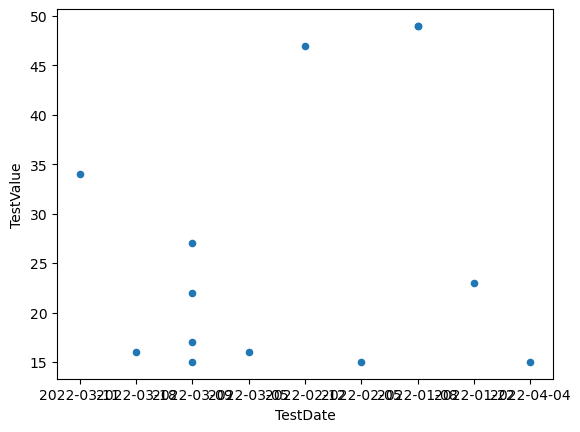

In [237]:
# investigating the % failures
# investigating the water activity failures
df_moisture_fail_percent = df_moisture_fail.loc[df_moisture_fail['TestName'] == 'Moisture Analysis - Moisture Content (%)']
df_moisture_fail_percent['TestValue'] = df_moisture_fail_percent['TestValue'].astype(float)
df_moisture_fail_percent = df_moisture_fail_percent.reset_index()
df_moisture_fail_percent.plot(x='TestDate', y='TestValue', kind='scatter')
plt.show()


#### outliers, water activity are labresultid 717098 and 717112, appears that they were mislabeled. Not sure if these were retested or not at a later date with proper data.

# Data Corrections
so far, remove two wa failures 717098 and 717112 and relabel the 'required' as 'fail' for 191585 and 'Pass' for the remaining in the 'Required' label for 'LabTestStatus'

In [254]:
# relabel labrestultid 191585 to 'Fail'
df_moisture.loc[df_moisture['LabResultId'] == 191585, 'LabTestStatus'] = 'Fail'


# relabel remaining moisture % 'Required' to 'Pass'
df_moisture.loc[(df_moisture['LabTestStatus'] == 'Required') & (df_moisture['TestName'] == 'Moisture Analysis - Moisture Content (%)'), 'LabTestStatus'] = 'Pass'

# remove 'not tested' from rows
df_moisture = df_moisture[df_moisture['TestValue'] != 'Not Tested']

# remove 'NotRequired' from rows
df_moisture = df_moisture[df_moisture['LabTestStatus'] != 'NotRequired']

# remove 1139660 from rows, impossible TestValue of 5774 for water activity
df_moisture = df_moisture[df_moisture['LabResultId'] != 1139660]

# water activity results which passed, but are impossible. falsely reported values
false_pass_aw = [402280, 271423, 1432, 1107512, 191479, 101984, 102111]
df_moisture = df_moisture[~df_moisture['LabResultId'].isin(false_pass_aw)]

# remove 345705	from rows, 'Pass' but has NaN in moisture %
df_moisture = df_moisture[df_moisture['LabResultId'] != 345705]

# remove high values
df_moisture = df_moisture.loc[(df_moisture['LabResultId'] != 717112)]
df_moisture = df_moisture.loc[(df_moisture['LabResultId'] != 717098)]

# remove 0 test values
df_moisture = df_moisture.loc[(df_moisture['TestValue'] != 0)]
df_moisture = df_moisture.loc[(df_moisture['TestValue'] != 0.0)]
df_moisture = df_moisture.loc[(df_moisture['TestValue'] != 410)]


# there are still 'required' LabTestStatuses which I cannot check for accuracy because I don't yet have the relationships between product and test sorted out yet.
# once that is completed, then I will be able to test if flower, aw < 0.65 and if solid edible aw < 0.85
# for now, I am going to change them to 'Pass'
df_moisture.loc[(df_moisture['LabTestStatus'] == 'Required') & (df_moisture['TestName'] == 'Moisture Analysis - Water Activity (aw)'), 'LabTestStatus'] = 'Pass'

# removing impossible dated samples
df_moisture['TestDate'] = pd.to_datetime(df_moisture['TestDate'])
df_moisture = df_moisture.loc[df_moisture['TestDate'] >= pd.Timestamp(2021, 10, 1)]

df_moisture['TestValue'] = df_moisture['TestValue'].astype(float)


df_moisture_percent = df_moisture.loc[df_moisture['TestName'] == 'Moisture Analysis - Moisture Content (%)']

# Still need to investigate the zero data points and why they may be there.

In [255]:

df_moisture_aw = df_moisture.loc[df_moisture['TestName'] == 'Moisture Analysis - Water Activity (aw)']
df_moisture_aw_pass = df_moisture_aw.loc[df_moisture_aw['LabTestStatus'] == 'Pass']
fig = px.scatter(df_moisture_aw_pass, x='TestDate', y='TestValue')
fig.show()



In [256]:
fig = px.histogram(df_moisture_aw_pass, x='TestValue', nbins=50)
fig.show()

# Moisture % analysis


In [257]:
df_moisture_percent_pass = df_moisture_percent.loc[df_moisture_percent['LabTestStatus'] == 'Pass']
df_moisture_percent_Fail = df_moisture_percent.loc[df_moisture_percent['LabTestStatus'] == 'Fail']


In [258]:
fig = px.scatter(df_moisture_percent_pass, x='TestDate', y='TestValue', title='Passing Moisture % Lab Results, Not filtered for Product Types')
fig.show()

In [259]:
fig = px.histogram(df_moisture_percent_pass, 'TestValue', nbins=50)
fig.show()

In [260]:
fig = px.scatter(df_moisture_percent_Fail, x='TestDate', y='TestValue')
fig.show()

In [267]:
# Create a list of unique LabLicenseeId values
lab_list = df_moisture_percent['LabLicenseeId'].unique().tolist()

# Loop through the list of labs and create a scatter chart for each one
for lab in lab_list:
    df_filtered = df_moisture_percent[df_moisture_percent['LabLicenseeId'] == lab]
    mean = df_filtered['TestValue'].mean()
    std = df_filtered['TestValue'].std()
    fig = px.scatter(df_filtered, x='TestDate', y='TestValue')
    fig.update_layout(title=f'Moisture Test Results for Lab {lab}', annotations=[dict(x=0.95, y=0.95, xref='paper', yref='paper', text=f'Mean: {mean:.2f}<br>Standard Deviation: {std:.2f}', align='right', showarrow=False)])
    fig.show()



In [272]:

df_filtered = df_moisture_percent
fig = px.histogram(df_filtered, x='TestValue', nbins=900)

# Calculate the skewness of the distribution
skewness = skew(df_filtered['TestValue'])

# Add the skewness as an annotation on the plot
fig.update_layout(
    annotations=[dict(x=0.95, y=0.95, xref='paper', yref='paper',
                        text=f'Skewness: {skewness:.2f}',
                        showarrow=False)],
    title=f'Moisture Percentage Test Results for  all Labs'
)
fig.show()

In [273]:
# Loop through the list of labs and create a bar chart for each one
for lab in lab_list:
    df_filtered = df_moisture_percent[df_moisture_percent['LabLicenseeId'] == lab]
    fig = px.histogram(df_filtered, x='TestValue', nbins=60)
    
    # Calculate the skewness of the distribution
    skewness = skew(df_filtered['TestValue'])
    
    # Add the skewness as an annotation on the plot
    fig.update_layout(
        annotations=[dict(x=0.95, y=0.95, xref='paper', yref='paper',
                          text=f'Skewness: {skewness:.2f}',
                          showarrow=False)],
        title=f'Moisture Test Results for Lab {lab}'
    )
    fig.show()

In [274]:
df_moisture.to_csv('moisture_cleaned.csv')